In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame=pd.read_csv("bmw.csv")

In [5]:
dataFrame.head() 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [6]:
dataFrame.describe() 

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [8]:
dataFrame.isnull().sum() #veri setindeki boş verilerin sayısını döndürür.

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

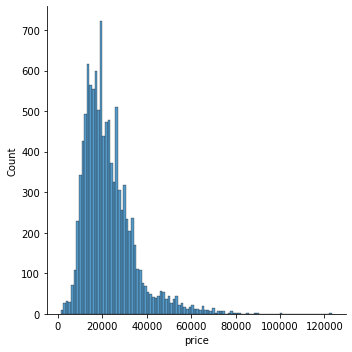

In [9]:
sbn.displot(dataFrame["price"])

In [10]:
dataFrame.corr() 

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000


In [12]:
dataFrame.corr()["price"].sort_values() #veri setindeki değişkenlerin fiyatı ne kadar etkilediğini gösterir.

mileage      -0.605397
mpg          -0.204882
tax           0.263484
engineSize    0.460196
year          0.623756
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

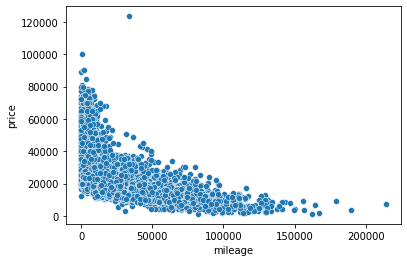

In [13]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)

In [15]:
dataFrame.sort_values("price",ascending=False).head(10) #en yüksek fiyatlı 10 arabayı döndürür.

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3638,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0
5362,M4,2016,99950,Automatic,771,Petrol,300,33.2,3.0
2909,M4,2017,89990,Semi-Auto,1336,Petrol,145,33.2,3.0
4776,M5,2019,89900,Semi-Auto,2269,Petrol,145,24.1,4.4
1813,8 Series,2019,88980,Semi-Auto,88,Petrol,145,24.4,4.4
721,8 Series,2019,84898,Semi-Auto,3185,Petrol,145,24.4,4.4
5877,M5,2019,81140,Semi-Auto,551,Petrol,145,24.1,4.4
6115,8 Series,2020,79991,Semi-Auto,151,Diesel,145,26.7,3.0
7024,X7,2020,79566,Semi-Auto,1000,Petrol,145,24.8,3.0
2602,X7,2020,78490,Semi-Auto,4919,Diesel,145,31.4,3.0


In [16]:
len(dataFrame)

10781

In [17]:
len(dataFrame)*0.01

107.81

In [18]:
yenidataFrame=dataFrame.sort_values("price",ascending=False).iloc[107:] #grafikteki dağılımı düzeltmek ve regression'da daha iyi 
#bir sonuç alabilmek için en yüksek fiyatlı 107(veri setinin %1'lik kısmını) arabayı veri setinden çıkarıyorum. 

In [19]:
yenidataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000
mean,2017.058741,22243.998969,25708.094716,131.552370,56.528921,2.157748
std,2.350808,10336.799736,25176.082905,61.751071,31.211385,0.540886
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14880.000000,5651.250000,135.000000,46.300000,2.000000
50%,2017.000000,20206.500000,18813.500000,145.000000,53.300000,2.000000
75%,2019.000000,27500.000000,38492.750000,145.000000,62.800000,2.000000
max,2020.000000,64103.000000,214000.000000,580.000000,470.800000,6.600000


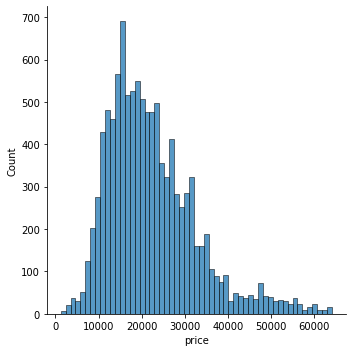

In [20]:
sbn.displot(yenidataFrame["price"])

In [21]:
dataFrame.groupby("year").mean()["price"]

year
1996     5995.000000
1997     3950.000000
1998     3950.000000
1999     3285.000000
2000     1624.500000
2001     7333.333333
2002     5486.500000
2003     9222.500000
2004     8213.166667
2005     5390.166667
2006     5252.714286
2007     4830.500000
2008     6240.043478
2009     6618.100000
2010     7490.390244
2011     9099.098039
2012     9533.689076
2013    11118.355742
2014    13323.598802
2015    15199.753796
2016    16638.403826
2017    19267.174898
2018    22721.656840
2019    31025.864275
2020    35377.680764
Name: price, dtype: float64

In [22]:
yenidataFrame.groupby("year").mean()["price"]

year
1996     5995.000000
1997     3950.000000
1998     3950.000000
1999     3285.000000
2000     1624.500000
2001     7333.333333
2002     5486.500000
2003     9222.500000
2004     8213.166667
2005     5390.166667
2006     5252.714286
2007     4830.500000
2008     6240.043478
2009     6618.100000
2010     7490.390244
2011     9099.098039
2012     9533.689076
2013    11118.355742
2014    13323.598802
2015    15082.211726
2016    16561.987234
2017    19226.056977
2018    22620.611111
2019    30133.591256
2020    34170.064880
Name: price, dtype: float64

In [23]:
yenidataFrame.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4805,8 Series,2019,64103,Semi-Auto,1897,Diesel,145,39.8,3.0
6177,X6,2019,63999,Semi-Auto,4000,Petrol,145,26.4,3.0
5140,X5,2020,63995,Automatic,5000,Hybrid,135,188.3,3.0
2566,X7,2020,63990,Semi-Auto,6137,Diesel,145,33.6,3.0
2891,8 Series,2018,63980,Semi-Auto,3891,Petrol,145,26.9,4.4


In [24]:
yenidataFrame=yenidataFrame.drop("model",axis=1) #sayısal olmayan değerleri kaldırıyorum. 

In [25]:
yenidataFrame=yenidataFrame.drop("transmission",axis=1)

In [26]:
yenidataFrame=yenidataFrame.drop("fuelType",axis=1)

Modelin oluşturulması

In [28]:
y=yenidataFrame["price"].values
x=yenidataFrame.drop("price",axis=1).values

In [29]:
y

array([64103, 63999, 63995, ...,  1500,  1445,  1200], dtype=int64)

In [30]:
x

array([[2.019e+03, 1.897e+03, 1.450e+02, 3.980e+01, 3.000e+00],
       [2.019e+03, 4.000e+03, 1.450e+02, 2.640e+01, 3.000e+00],
       [2.020e+03, 5.000e+03, 1.350e+02, 1.883e+02, 3.000e+00],
       ...,
       [2.007e+03, 1.670e+05, 1.250e+02, 5.760e+01, 2.000e+00],
       [2.004e+03, 1.620e+05, 2.050e+02, 4.960e+01, 2.000e+00],
       [1.999e+03, 8.200e+04, 2.450e+02, 3.100e+01, 2.800e+00]])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [33]:
len(x_train)

7471

In [34]:
len(x_test)

3203

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler=MinMaxScaler()

In [37]:
x_train=scaler.fit_transform(x_train)

In [38]:
x_test=scaler.transform(x_test)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
x_train.shape #ilk değer veri sayısı,ikinci değer sütun sayısı

(7471, 5)

In [42]:
model=Sequential()
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [43]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
30/30 [==============================] - 1s 6ms/step - loss: 595528512.0000 - val_loss: 615880256.0000
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 595518720.0000 - val_loss: 615872000.0000
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 595506944.0000 - val_loss: 615849152.0000
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 595458368.0000 - val_loss: 615758912.0000
Epoch 5/300
30/30 [==============================] - 0s 1ms/step - loss: 595291776.0000 - val_loss: 615470272.0000
Epoch 6/300
30/30 [==============================] - 0s 1ms/step - loss: 594815104.0000 - val_loss: 614706944.0000
Epoch 7/300
30/30 [==============================] - 0s 1ms/step - loss: 593643264.0000 - val_loss: 612930432.0000
Epoch 8/300
30/30 [==============================] - 0s 2ms/step - loss: 591096320.0000 - val_loss: 609289728.0000
Epoch 9/300
30/30 [==============================] - 0s 1ms/step - loss: 5861733

In [44]:
kayipVeri=pd.DataFrame(model.history.history)

In [45]:
kayipVeri.head()

,loss,val_loss
0,595528512.0,615880256.0
1,595518720.0,615872000.0
2,595506944.0,615849152.0
3,595458368.0,615758912.0
4,595291776.0,615470272.0


<AxesSubplot:>

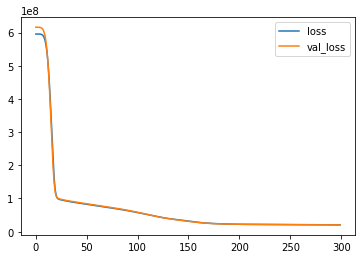

In [46]:
kayipVeri.plot()

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [48]:
tahminDizisi=model.predict(x_test)

In [49]:
tahminDizisi

array([[23720.787],
       [26849.67 ],
       [23479.94 ],
       ...,
       [29851.008],
       [26116.701],
       [23405.682]], dtype=float32)

In [50]:
mean_absolute_error(y_test,tahminDizisi) #tahmin dizisi ve y_test arasındaki fark

3191.580490793543

In [51]:
yenidataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000,10674.000000
mean,2017.058741,22243.998969,25708.094716,131.552370,56.528921,2.157748
std,2.350808,10336.799736,25176.082905,61.751071,31.211385,0.540886
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14880.000000,5651.250000,135.000000,46.300000,2.000000
50%,2017.000000,20206.500000,18813.500000,145.000000,53.300000,2.000000
75%,2019.000000,27500.000000,38492.750000,145.000000,62.800000,2.000000
max,2020.000000,64103.000000,214000.000000,580.000000,470.800000,6.600000


ortalama fiyat 22243,fark ise 3191 fark/ortalama fiyattan %14 lük bir fark var

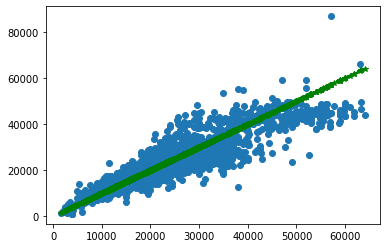

In [54]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")